In [1]:
import pandas as pd
import numpy as np
import re
import squarify
import matplotlib.pyplot as plt

In [2]:
# 读取2017-2018CitationArticles文件
data = pd.read_csv('2017-2018CitationArticles.csv', '\t', index_col=False)
print('施引文献共有：', data.shape[0])

施引文献共有： 111


共有国家或地区： 42


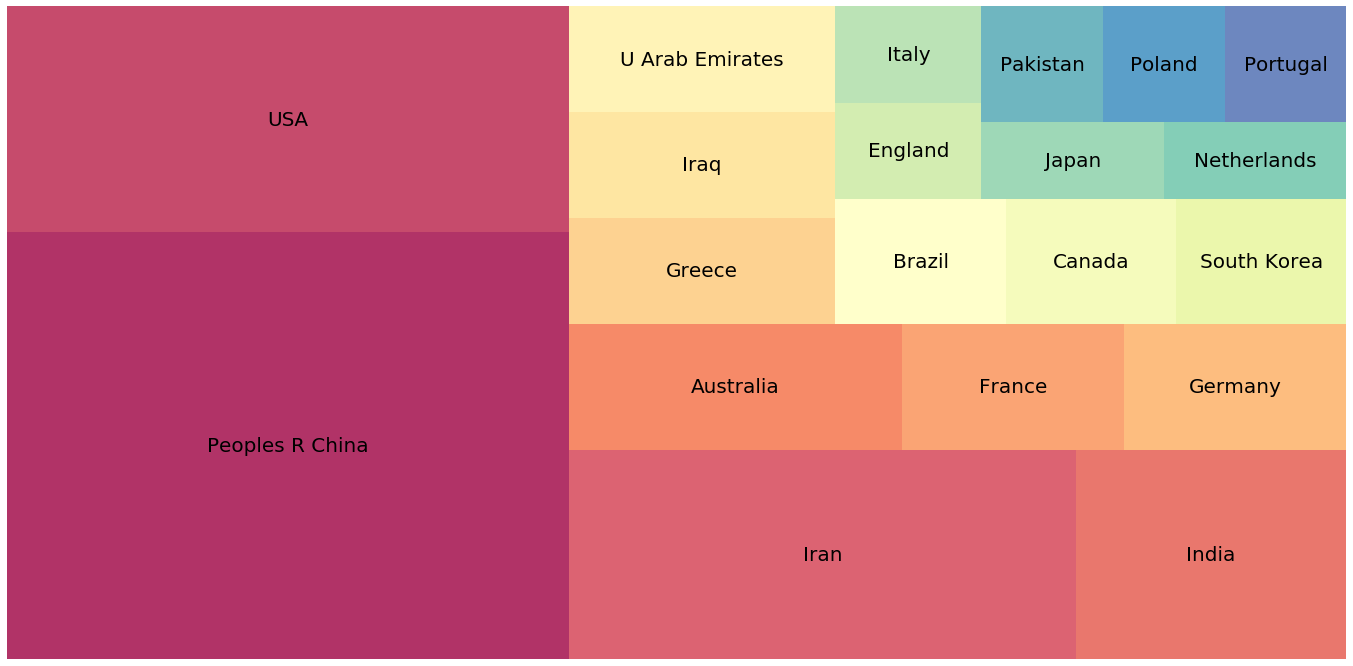

In [3]:
# 统计国家或地区
SumCountries={}
for str in data['C1']:
    countries={}
    if str.count('[')==1:
        c1=str.split(',')[-1].strip()
        if c1[-3:]=='USA':
            c1='USA'
        SumCountries[c1]=SumCountries.get(c1, 0) + 1
    else:
        for i in str.split('; ['):
            c1=i.split(',')[-1].strip()
            if c1[-3:]=='USA':
                c1='USA'
            countries[c1]=countries.get(c1, 0) + 1
        for key in countries.keys():
            SumCountries[key]=SumCountries.get(key, 0) + 1
SumCountries=sorted(SumCountries.items(), key=lambda item:(-item[1], item[0]))
print('共有国家或地区：', len(SumCountries))
# print(SumCountries[:20])

# 储存文件
name_l=[x[0] for x in SumCountries[:]]
num_l=[x[1] for x in SumCountries[:]]
s = pd.Series(num_l, index=name_l)
s.to_csv("SumCountries.csv",sep="\t", header=False)

# 绘图:绘制前20
name_list=[x[0] for x in SumCountries[:20]]
num_list=[x[1] for x in SumCountries[:20]]
colors = [plt.cm.Spectral(i/float(len(num_list))) for i in range(len(num_list))]
fig = plt.figure(figsize=(24,12))
plt.rc('font', size=20)
squarify.plot(sizes=num_list, label=name_list, color=colors, alpha=.8)
plt.axis('off')
plt.show()

共有来源出版物： 78


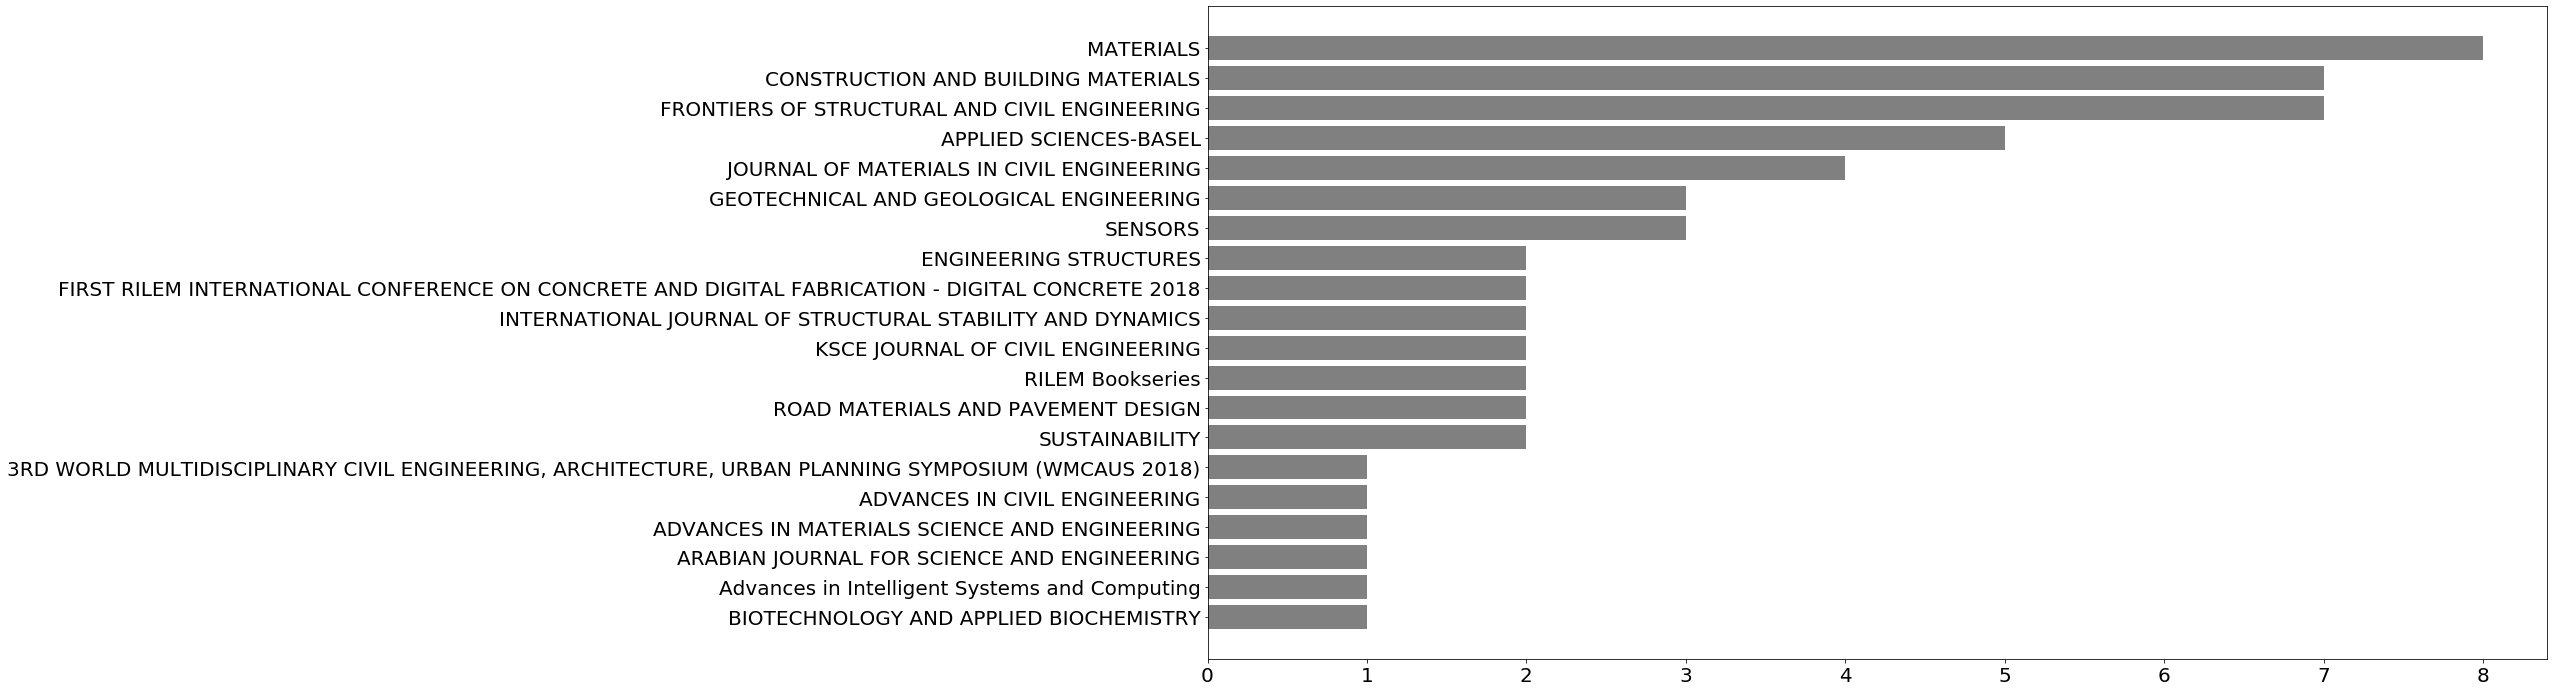

In [4]:
# 来源出版物
SumPublication={}
for Publication in data['SO']:
    SumPublication[Publication]=SumPublication.get(Publication, 0) + 1
for Publication in data['SE']:
    if pd.isnull(Publication)==0:
        SumPublication[Publication]=SumPublication.get(Publication, 0) + 1
SumPublication=sorted(SumPublication.items(), key=lambda item:(-item[1], item[0]))
print('共有来源出版物：', len(SumPublication))
# print(SumPublication)

# 储存文件
name_l=[x[0] for x in SumPublication[:]]
num_l=[x[1] for x in SumPublication[:]]
s = pd.Series(num_l, index=name_l)
s.to_csv("SumPublication.csv",sep="\t", header=False)

# 绘图:绘制前20
name_list=[x[0] for x in SumPublication[:20]]
num_list=[x[1] for x in SumPublication[:20]]
fig = plt.figure(figsize=(24,12))
plt.barh(range(len(num_list)), num_list,color="gray",tick_label=name_list)
plt.gca().invert_yaxis()
plt.show()

共有机构： 186


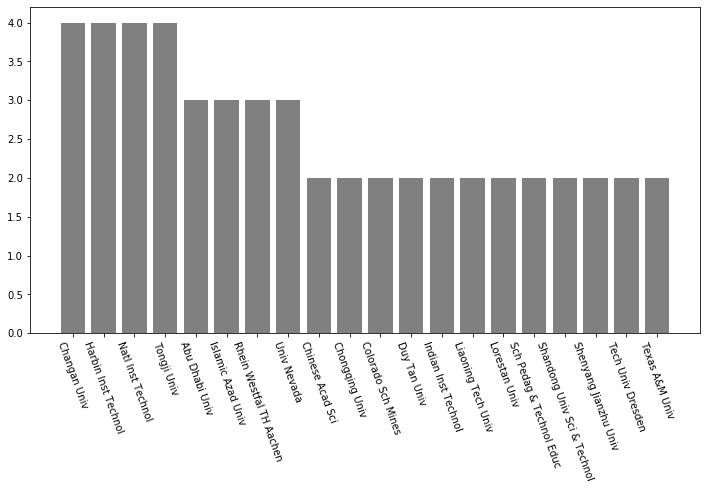

In [5]:
# 统计机构
SumOrganizations={}
for str in data['C1']:
    Organizations={}
    if str.count('[')==1:
        c1=str.split(']')[-1].split(',')[0].strip()
        SumOrganizations[c1]=SumOrganizations.get(c1, 0) + 1
    else:
        for i in str.split('; ['):
            c1=i.split(']')[-1].split(',')[0].strip()
            Organizations[c1]=Organizations.get(c1, 0) + 1
        for key in Organizations.keys():
            SumOrganizations[key]=SumOrganizations.get(key, 0) + 1
SumOrganizations=sorted(SumOrganizations.items(), key=lambda item:(-item[1], item[0]))
print('共有机构：', len(SumOrganizations))
# print(SumOrganizations)

# 储存文件
name_l=[x[0] for x in SumOrganizations[:]]
num_l=[x[1] for x in SumOrganizations[:]]
s = pd.Series(num_l, index=name_l)
s.to_csv("SumOrganizations.csv",sep="\t", header=False)

# 绘图:绘制前20
name_list=[x[0] for x in SumOrganizations[:20]]
num_list=[x[1] for x in SumOrganizations[:20]]
fig = plt.figure(figsize=(12,6))
plt.rc('font', size=10)
plt.bar(range(len(num_list)), num_list,color="gray",tick_label=name_list)
plt.xticks(rotation=-70)
plt.show()

共有来源出版物： 26


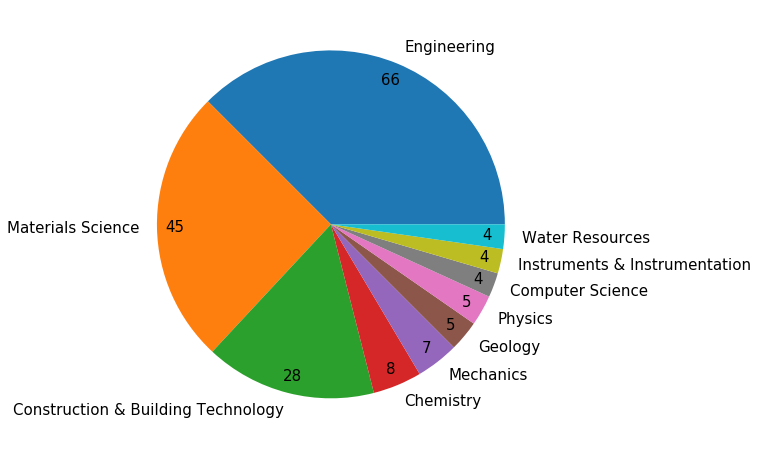

In [6]:
# 研究方向
SumResearchAreas={}
for ResearchArea in data['SC']:
    for i in ResearchArea.split(';'):
        c1=i.strip()
        SumResearchAreas[c1]=SumResearchAreas.get(c1, 0) + 1
SumResearchAreas=sorted(SumResearchAreas.items(), key=lambda item:(-item[1], item[0]))
print('共有来源出版物：', len(SumResearchAreas))
# print(SumResearchAreas)

# 储存文件
name_l=[x[0] for x in SumResearchAreas[:]]
num_l=[x[1] for x in SumResearchAreas[:]]
s = pd.Series(num_l, index=name_l)
s.to_csv("SumResearchAreas.csv",sep="\t", header=False)

# 绘图:绘制前10
name_list=[x[0] for x in SumResearchAreas[:10]]
num_list=[x[1] for x in SumResearchAreas[:10]]
s = pd.Series(num_list, index=name_list)
plt.rc('font', size=15)
s.plot(kind='pie', subplots=True, figsize=(8, 8), pctdistance=0.9, autopct=lambda val:int(np.round(val/100.*sum([int(num) for num in num_list]))))
plt.axis('off')
plt.rc('font', size=15)
plt.show()